Simple QFT example based off of section 3.5 in the Qiskit Textbook https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html

**Imports**

In [1]:
import numpy
from numpy import pi
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer
from qiskit.visualization import plot_bloch_multivector

**Rotation Function**

In [2]:
# Function for applying Hadamards and CROT Gates to the circuit
def qft_rotate(circuit, n):
    # If the circuit is empty, stop
    if n == 0:
        return
    # Apply Hadamard to MSB and CROT from all other qubits to MSB
    n -= 1
    circuit.h(n)
    for i in range(n):
        circuit.cp(pi/2**(n-i), i, n)
    # Call qft_rotate recursively until circuit is empty
    qft_rotate(circuit, n)

**Swap Function**

In [3]:
# Function for swapping MSB with LSB, MSB-1 with LSB-1, etc.
# Essentially flip the circuit
def qft_swap(circuit):
    n = circuit.num_qubits
    for i in range(n//2):
        circuit.swap(i, n-i-1)

**QFT Function**

In [4]:
def qft(circuit):
    qft_rotate(circuit, circuit.num_qubits)
    qft_swap(circuit)

**Run QFT**

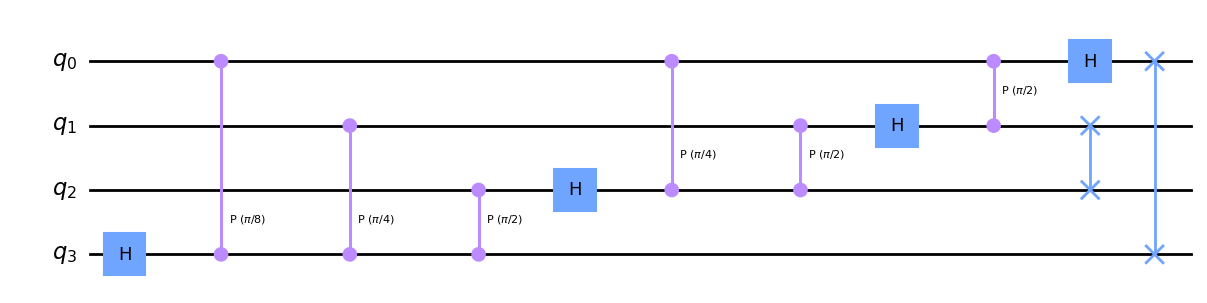

In [5]:
qc = QuantumCircuit(4)
qft(qc)
qc.draw()

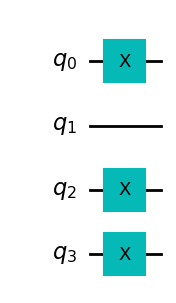

In [6]:
qc = QuantumCircuit(4)
# Put qubits into state 13
qc.x(0)
qc.x(2)
qc.x(3)
qc.draw()

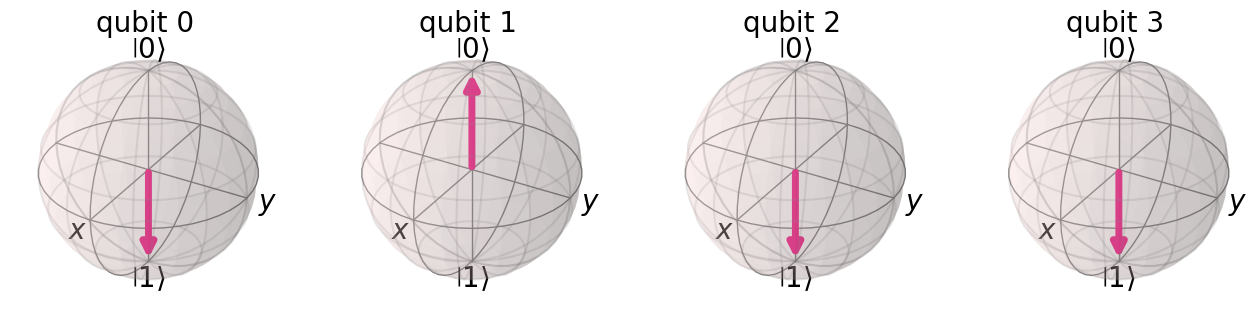

In [7]:
sim = Aer.get_backend("aer_simulator")
qc1 = qc.copy()
qc1.save_statevector()
sv = sim.run(qc1).result().get_statevector()
plot_bloch_multivector(sv)

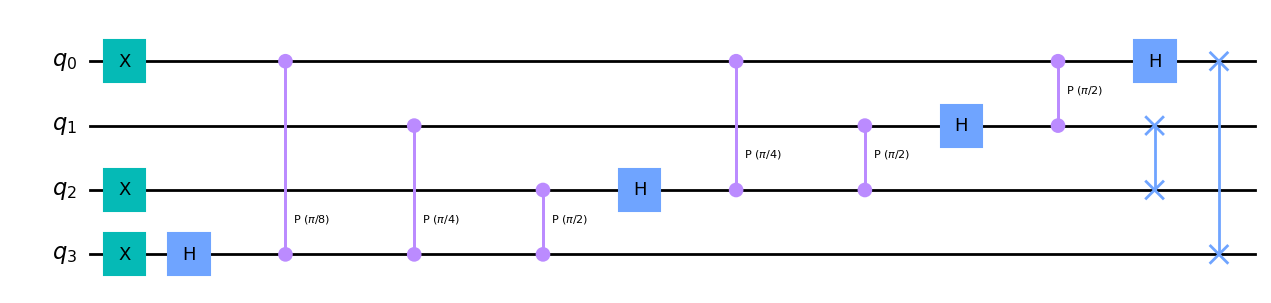

In [8]:
qft(qc)
qc.draw()

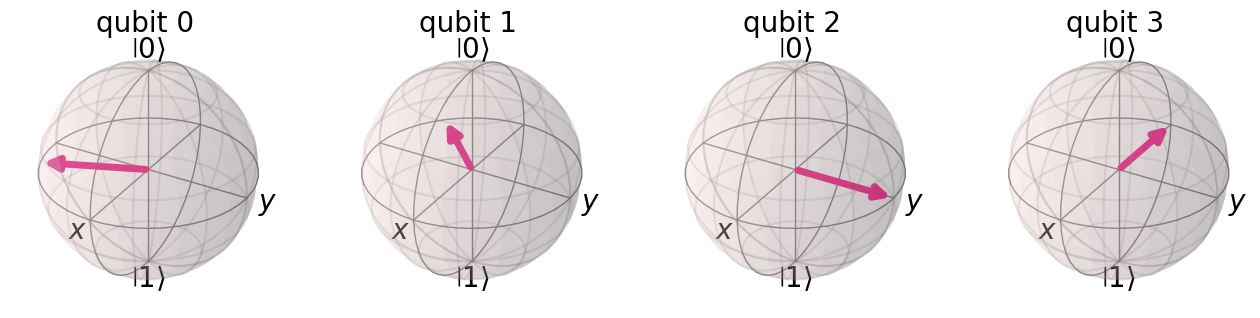

In [9]:
qc1 = qc.copy()
qc1.save_statevector()
sv = sim.run(qc1).result().get_statevector()
plot_bloch_multivector(sv)